# Importing Dependencies

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Exploratory Data Analysis

In [136]:
sales = pd.read_csv("Train.csv")
sales.shape

(8523, 12)

In [137]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [138]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [139]:
# Dropping identifier columns 
sales.drop(columns=["Item_Identifier","Outlet_Identifier"], axis=1, inplace=True)

In [140]:
sales.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Dealing with missing values

In [141]:
sales['Item_Weight'].fillna(sales['Item_Weight'].mean(), inplace=True)

In [142]:
# Dropping missing values fron Outlet size
sales = sales.dropna(subset='Outlet_Size')

In [143]:
sales.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [144]:
sales.duplicated().sum()

0

In [145]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.888856,0.064505,141.256859,1995.794373,2322.688445
std,4.073798,0.050092,62.229701,8.842615,1741.592093
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,9.800000,0.026681,94.012000,1987.000000,974.731200
50%,12.857645,0.052811,143.178600,1997.000000,1928.156800
75%,15.700000,0.092834,185.892400,2004.000000,3271.075400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [146]:
sales['Outlet_Establishment_Year'] = pd.to_datetime(sales['Outlet_Establishment_Year'], format='%Y')

In [147]:
sales['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3641
Regular    2076
LF          233
reg          82
low fat      81
Name: count, dtype: int64

We can see that there is an error in recording the data where low fat is represented by LF and low fat and Regular is represented by Reg as well. We must replace these value with a uniform representation

In [148]:
#Cleaning Item_Fat_Content 
replace = {"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"} 
for i, j in replace.items():
    sales['Item_Fat_Content']=sales['Item_Fat_Content'].str.replace(i,j)

In [149]:
sales['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3955
Regular    2158
Name: count, dtype: int64

# Univariate Analysis
- Histogram and Countplots
- The major goal here is to check how the data is distributed

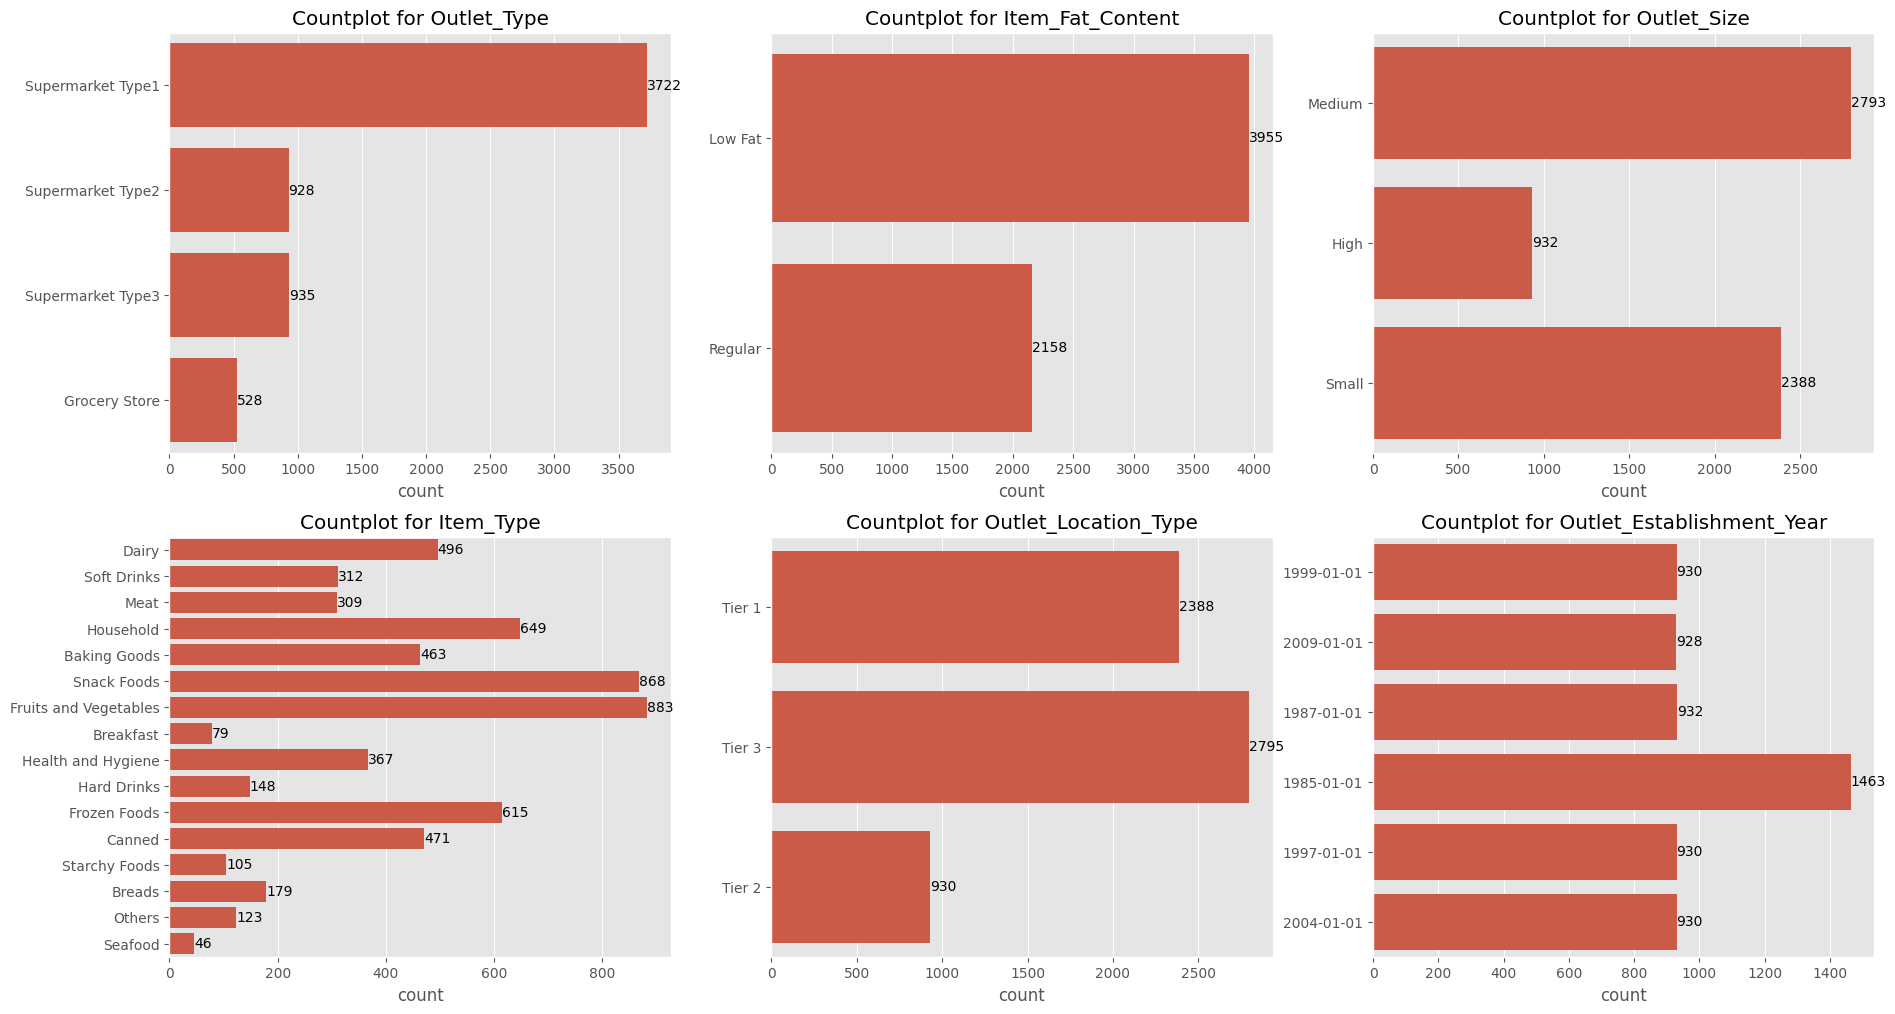

In [124]:
categorical_features = ['Outlet_Type','Item_Fat_Content','Outlet_Size','Item_Type', 'Outlet_Location_Type', 'Outlet_Establishment_Year']
plt.figure(figsize=(22,12))

for i in enumerate(categorical_features):
    plt.subplot(2,3, i[0]+1)
    ax = sns.countplot(sales[i[1]])
    for j in ax.containers:
        ax.bar_label(j)
    ax.set_title(f"Countplot for {i[1]}")
    ax.set_ylabel("")
plt.show()

- Except for outlet_Type and Item_Type most of our other categorical variables seem to have only minor data imbalance.
- Item_Type needs to be combined so that small frequency of item type are represented as "Others" 

# Label Encoding our ordinal features 

In [150]:
from sklearn.preprocessing import LabelEncoder
lable_encoder = LabelEncoder()

In [151]:
E_Outlet_Size = lable_encoder.fit_transform(sales['Outlet_Size'])
E_Outlet_Location_Type = lable_encoder.fit_transform(sales['Outlet_Location_Type'])
E_Item_Fat_Content = lable_encoder.fit_transform(sales['Item_Fat_Content'])

In [152]:
sales['Outlet_Size'] = E_Outlet_Size
sales['Outlet_Location_Type'] = E_Outlet_Location_Type
sales['Item_Fat_Content'] = E_Item_Fat_Content
sales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,Dairy,249.8092,1999-01-01,1,0,Supermarket Type1,3735.1380
1,5.920,1,0.019278,Soft Drinks,48.2692,2009-01-01,1,2,Supermarket Type2,443.4228
2,17.500,0,0.016760,Meat,141.6180,1999-01-01,1,0,Supermarket Type1,2097.2700
4,8.930,0,0.000000,Household,53.8614,1987-01-01,0,2,Supermarket Type1,994.7052
5,10.395,1,0.000000,Baking Goods,51.4008,2009-01-01,1,2,Supermarket Type2,556.6088


# Histogram

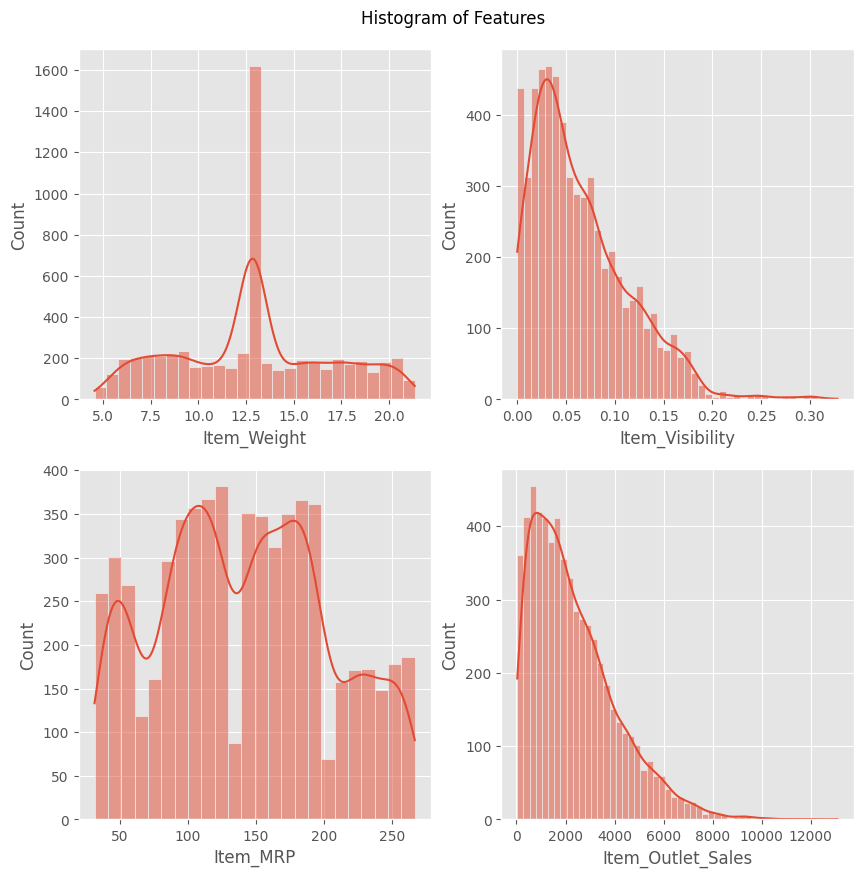

In [153]:
# Checking distribution of numeric features

numeric_features = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]
plt.figure(figsize=(10,10))
plt.suptitle("Histogram of Features", y = 0.92)
for i in enumerate(numeric_features):
    plt.subplot(2,2, i[0]+1)
    ax = sns.histplot(sales[i[1]], kde=True)
plt.show()

- We can see that the data is not distributed normally. 
- Item visibility and outlet sales are right tailed while
- Item_Weight has data distribution that has peaked in the middle which was caused as the mean was used to replace the missing values  
- Item_MRP has thin tailed

# Log Transformation for normal distribution

In [154]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p, validate=True)

In [155]:
# Using Log Transformation
Log_Item_Visibility = log_transformer.transform(sales['Item_Visibility'].values.reshape(-1,1))
Log_Item_MRP = log_transformer.transform(sales['Item_MRP'].values.reshape(-1,1))
Log_Item_Weight = log_transformer.transform(sales['Item_Weight'].values.reshape(-1,1))

In [156]:
sales['Item_Visibility'] = Log_Item_Visibility
sales['Item_MRP'] = Log_Item_MRP
sales['Item_Weight'] = Log_Item_Weight

In [157]:
sales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,2.332144,0,0.015920,Dairy,5.524692,1999-01-01,1,0,Supermarket Type1,3735.1380
1,1.934416,1,0.019095,Soft Drinks,3.897299,2009-01-01,1,2,Supermarket Type2,443.4228
2,2.917771,0,0.016621,Meat,4.960170,1999-01-01,1,0,Supermarket Type1,2097.2700
4,2.295560,0,0.000000,Household,4.004810,1987-01-01,0,2,Supermarket Type1,994.7052
5,2.433175,1,0.000000,Baking Goods,3.958922,2009-01-01,1,2,Supermarket Type2,556.6088


KeyError: 'Log_Item_Weight'

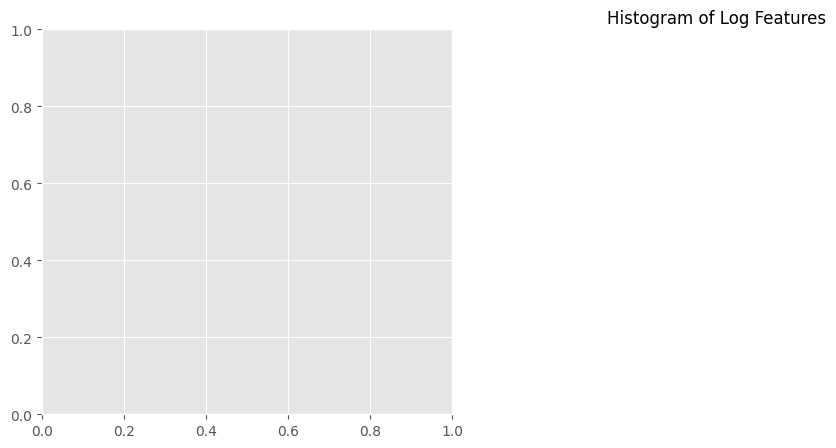

In [158]:
log_features = ["Log_Item_Weight", "Log_Item_Visibility", "Log_Item_MRP"]
plt.figure(figsize=(18,5))
plt.suptitle("Histogram of Log Features", y = 0.92)
for i in enumerate(log_features):
    plt.subplot(1,3, i[0]+1)
    ax = sns.histplot(sales[i[1]], kde=True)
plt.show()

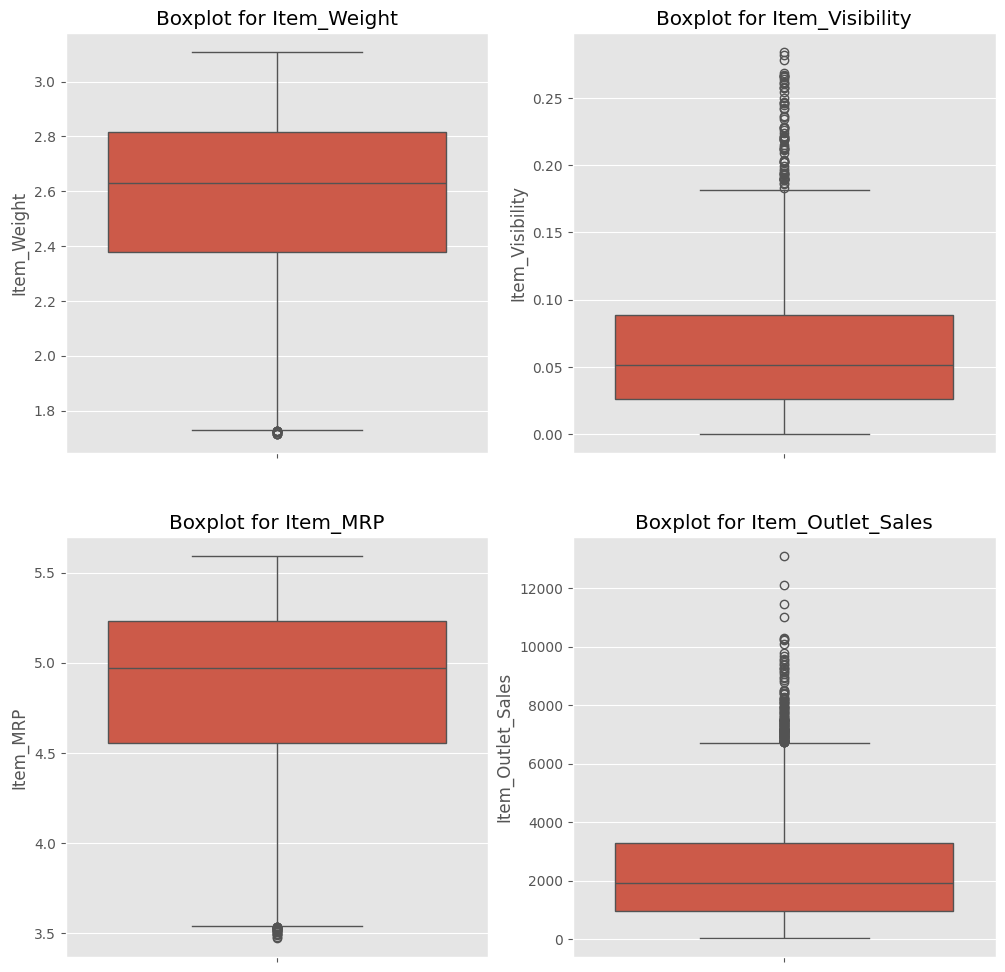

In [159]:
# Checking for outliers
numeric_features = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]

plt.figure(figsize=(12,12))

for i in enumerate(numeric_features):
    plt.subplot(2,2, i[0]+1)
    ax = sns.boxplot(sales[i[1]])
    ax.set_title(f"Boxplot for {i[1]}")
plt.show()

- We can see that the variable distribution is not normally distributed
- We will try to reexamine the distributin after we drop the outliers

# Bivariate Analysis

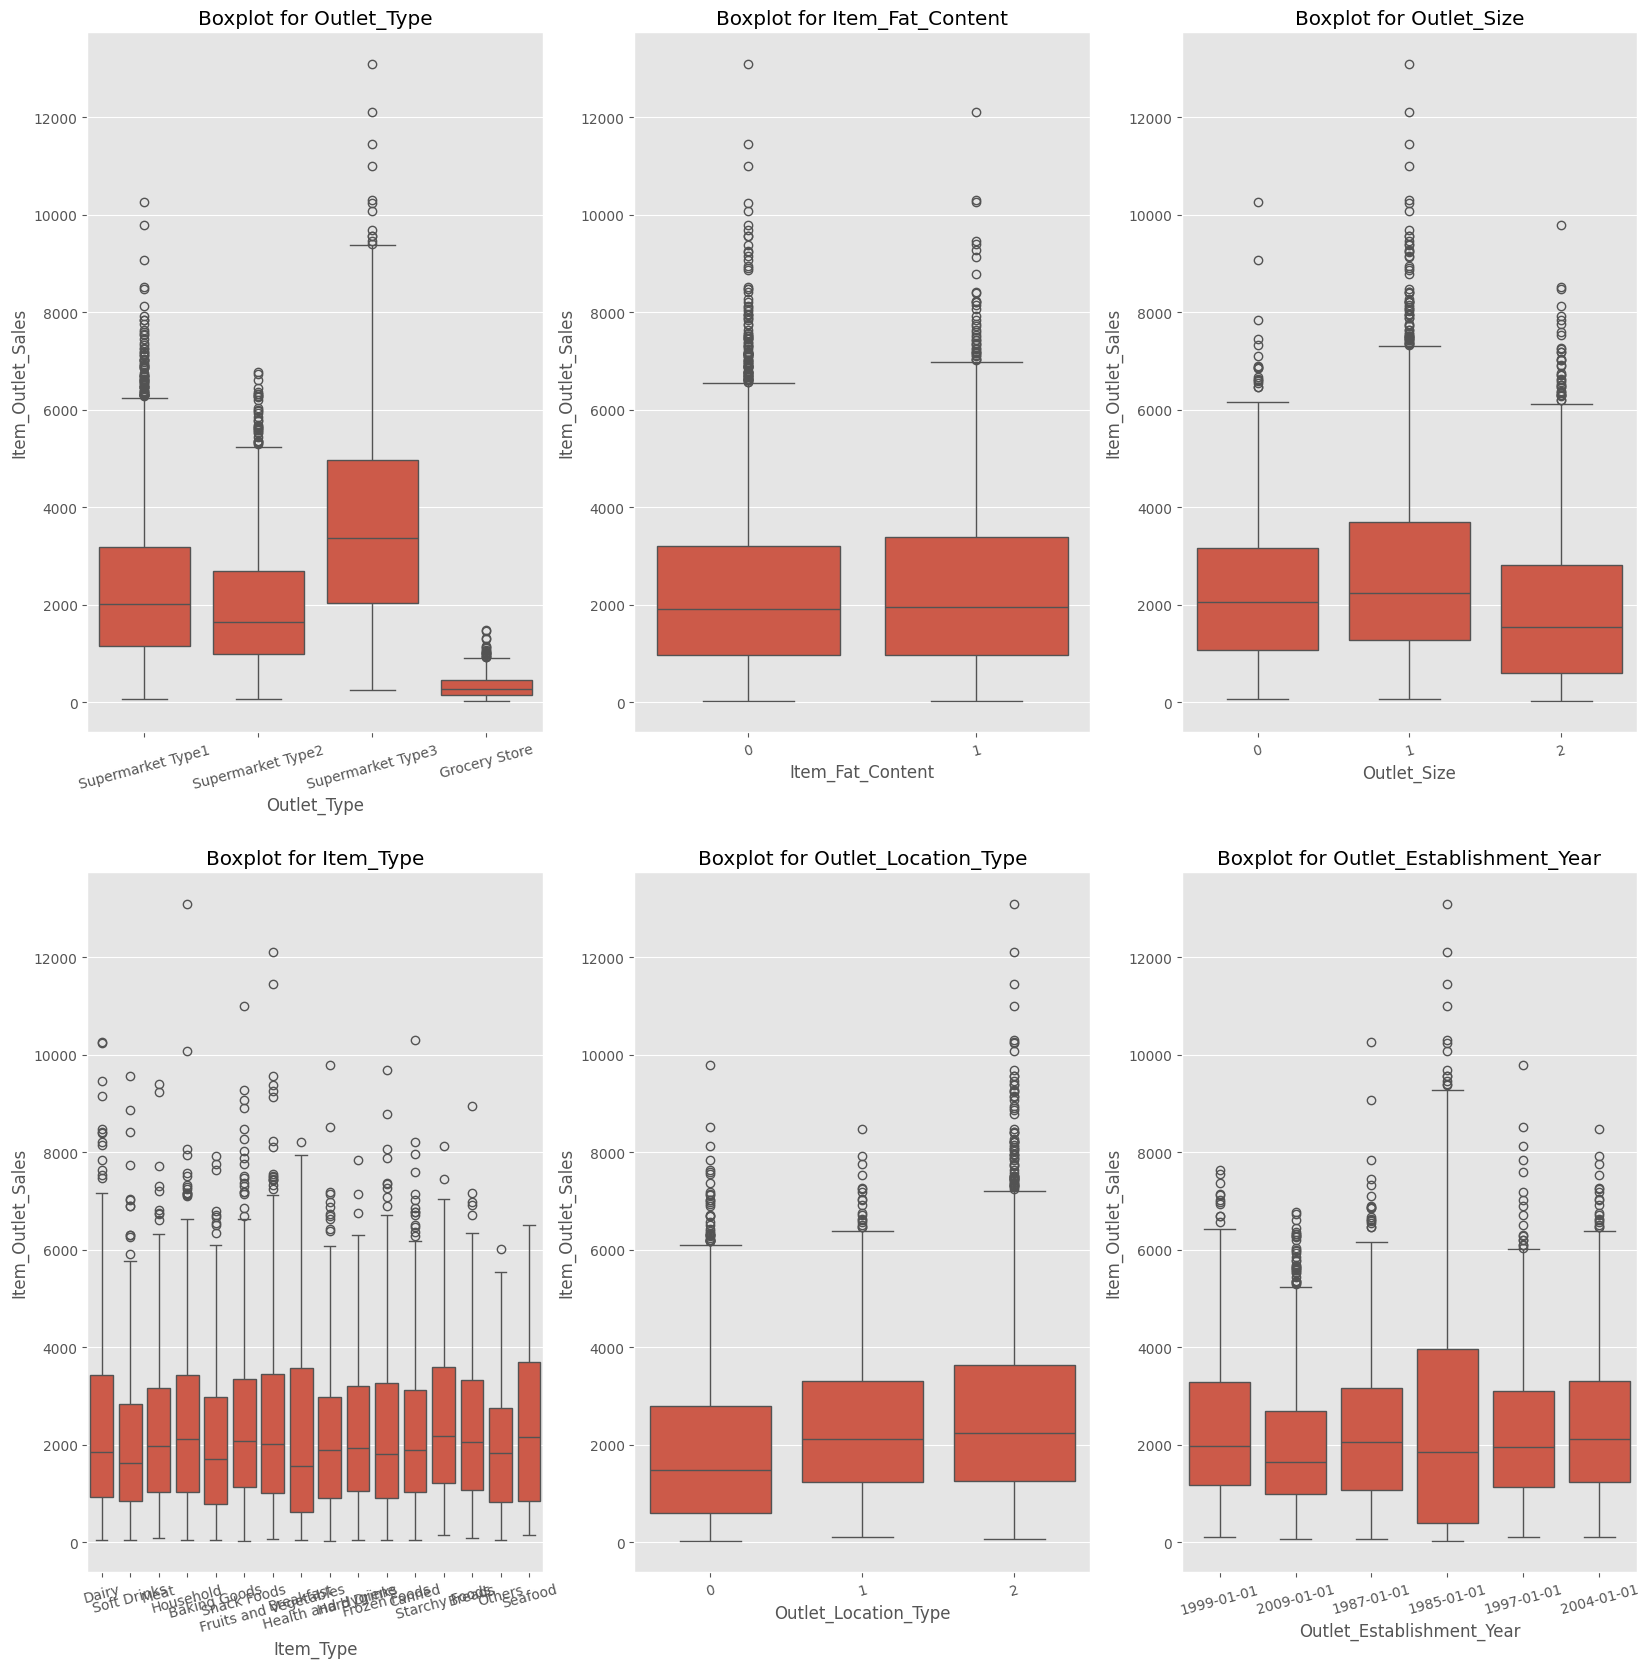

In [160]:
plt.figure(figsize=(20,20))

for i in enumerate(categorical_features):
    plt.subplot(2,3, i[0]+1)
    ax = sns.boxplot(sales, x= i[1], y = 'Item_Outlet_Sales')
    ax.set_title(f"Boxplot for {i[1]}")
    plt.xticks(rotation = 15)
plt.show()


# Multivariate Analysis

In [161]:
sales.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

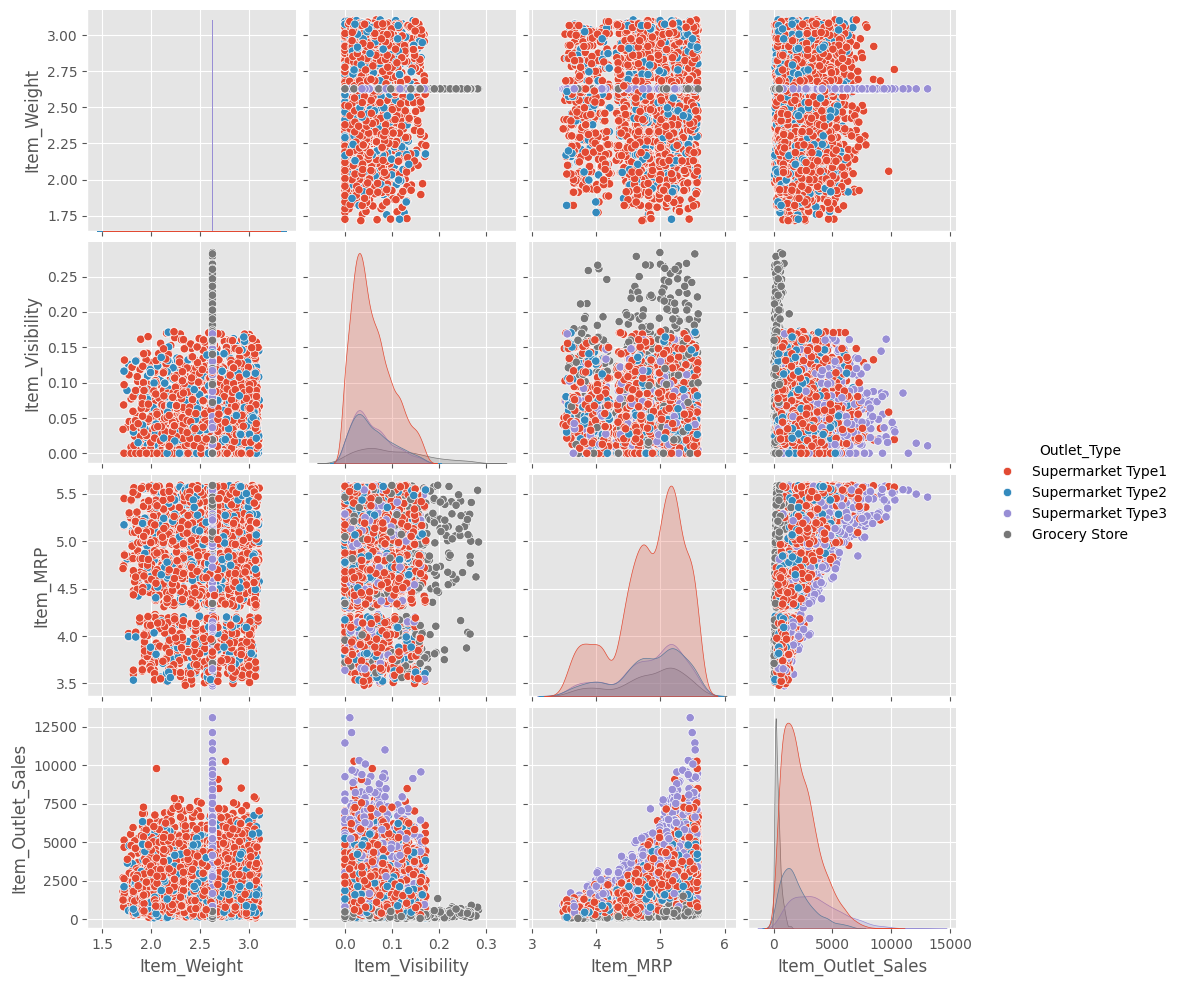

In [162]:
ax = sns.pairplot(sales, vars=['Item_Weight', 'Item_Visibility',
                        'Item_MRP','Item_Outlet_Sales'], 
                    hue="Outlet_Type")

- We can see that there exists a linear relationhip between Item Outlet Sales with Item MRP and Item_Visibility
- Other features seem to have no such particular relation 

Item visibility and outlet sales have a great deal of outlier

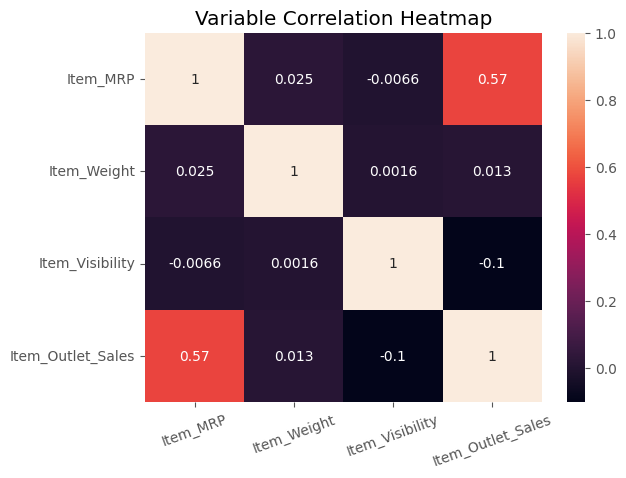

In [163]:
s_cor = sales[['Item_MRP','Item_Weight','Item_Visibility','Item_Outlet_Sales']].corr()
ax = sns.heatmap(s_cor,annot=True)
ax.set_title('Variable Correlation Heatmap')
plt.xticks(rotation = 20)
plt.show()

The data has acceptable leve of multicollinearity